<a href="https://colab.research.google.com/github/Muzsek/One_Numer/blob/main/O_N_AIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install captcha

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 2.9 MB/s eta 0:00:00


In [108]:
import string
from captcha.image import ImageCaptcha
import random
import os
from pathlib import Path
from google.colab import drive
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision import transforms

#drive.mount("/content/drive")


# !ls /content/drive/MyDrive/Colab/One\ Number/
dir_path = Path("/content/drive/MyDrive/Colab/One Number")
dir_path
training_folder = dir_path / "training"
testing_folder = dir_path / "testing"
os.makedirs(training_folder, exist_ok = True)
os.makedirs(testing_folder, exist_ok = True)



In [40]:
chars = string.digits

img = ImageCaptcha(width = 120,
                    height = 50)
for i in range(int(1000*0.8)):
  label = ''.join(random.choices(chars))
  image = img.generate_image(label)
  image.save(training_folder / f"{label}_{i}.png")

for i in range(int(1000*0.2)):
  label = ''.join(random.choices(chars))
  image = img.generate_image(label)
  image.save(testing_folder / f"{label}_{i}.png")
print(f"{len(os.listdir(os.path.join(training_folder)))} training images created")
print(f"{len(os.listdir(os.path.join(testing_folder)))} testing images created")

800 training images created
200 testing images created


In [38]:
#!rm -rf /content/drive/MyDrive/Colab/One Number/training/*
#!rm -rf /content/drive/MyDrive/Colab/One Number/testing/*

In [62]:
print(len(os.listdir(training_folder)))
print(f"First 10 files: {os.listdir(training_folder)[:10]}")
print(len(os.listdir(testing_folder)))
print(f"First 10 files: {os.listdir(testing_folder)[:10]}")

800
First 10 files: ['4_0.png', '1_1.png', '5_2.png', '7_3.png', '9_4.png', '9_5.png', '3_6.png', '5_7.png', '3_8.png', '3_9.png']
200
First 10 files: ['4_0.png', '0_1.png', '6_2.png', '9_3.png', '2_4.png', '7_5.png', '4_6.png', '7_7.png', '3_8.png', '7_9.png']


In [96]:
def ShowImage(image_path):
  image = Image.open(image_path)
  plt.imshow(image)
  plt.axis("off")
  plt.show()

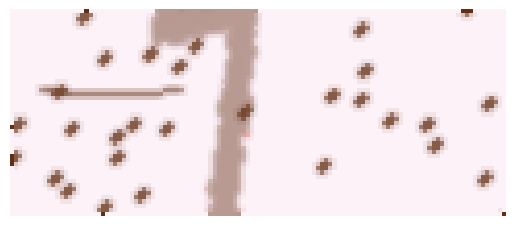

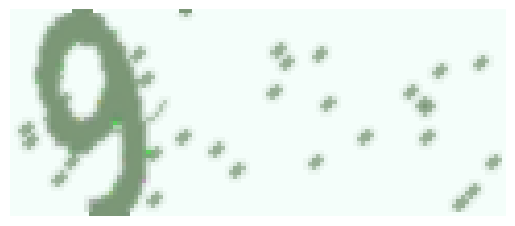

In [101]:
ShowImage(training_folder / os.listdir(training_folder)[3])
ShowImage(testing_folder / os.listdir(testing_folder)[3])

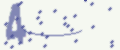

In [107]:
# Making the first_image form PIL to a tensor
first_image = Image.open(training_folder / os.listdir(training_folder)[0])
first_image

In [112]:
transform = transforms.Compose(
    [
        transforms.PILToTensor()
    ]
)
transform(first_image)

tensor([[[245, 245, 245,  ..., 245, 245, 245],
         [245, 245, 245,  ..., 245, 245, 245],
         [245, 245, 245,  ..., 245, 245, 245],
         ...,
         [245, 245, 245,  ..., 245, 245, 245],
         [245, 245, 245,  ..., 245, 245, 245],
         [245, 245, 245,  ..., 245, 245, 245]],

        [[248, 248, 248,  ..., 248, 248, 248],
         [248, 248, 248,  ..., 248, 248, 248],
         [248, 248, 248,  ..., 248, 248, 248],
         ...,
         [248, 248, 248,  ..., 248, 248, 248],
         [248, 248, 248,  ..., 248, 248, 248],
         [248, 248, 248,  ..., 248, 248, 248]],

        [[241, 241, 241,  ..., 241, 241, 241],
         [241, 241, 241,  ..., 241, 241, 241],
         [241, 241, 241,  ..., 241, 241, 241],
         ...,
         [241, 241, 241,  ..., 241, 241, 241],
         [241, 241, 241,  ..., 241, 241, 241],
         [241, 241, 241,  ..., 241, 241, 241]]], dtype=torch.uint8)